In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#Loading dataset into a DataFrame(data)

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Chennai houseing sale.csv")
data.head()

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P03210  Karapakkam      1004  04-05-2011            131        1.0   
1  P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2  P01812       Adyar       909  04-02-2012             70        1.0   
3  P05346   Velachery      1855  13-03-2010             14        3.0   
4  P06210  Karapakkam      1226  05-10-2009             84        1.0   

   N_BATHROOM  N_ROOM SALE_COND PARK_FACIL  ... UTILITY_AVAIL  STREET MZZONE  \
0         1.0       3  AbNormal        Yes  ...        AllPub   Paved      A   
1         1.0       5  AbNormal         No  ...        AllPub  Gravel     RH   
2         1.0       3  AbNormal        Yes  ...           ELO  Gravel     RL   
3         2.0       5    Family         No  ...       NoSewr    Paved      I   
4         1.0       3  AbNormal        Yes  ...        AllPub  Gravel      C   

  QS_ROOMS QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  COMMIS  SALES_PRICE  
0      4.0         3.9         4.9       4.330   380000  144400      7600000  
1      4.9         4.2         2.5       3.765   760122  304049     21717770  
2      4.1         3.8         2.2       3.090   421094   92114     13159200  
3      4.7         3.9         3.6       4.010   356321   77042      9630290  
4      3.0         2.5         4.1       3.290   237000   74063      7406250  

[5 rows x 22 columns]

# **Cleaning the data**

In [8]:
data_shape = data.shape
print(f"The dataframe has {data_shape[0]} records and {data_shape[1]} features")

The dataframe has 7109 records and 22 features


In [9]:
#Checking For Missing Values

data.isna().any()

PRT_ID           False
AREA             False
INT_SQFT         False
DATE_SALE        False
DIST_MAINROAD    False
N_BEDROOM         True
N_BATHROOM        True
N_ROOM           False
SALE_COND        False
PARK_FACIL       False
DATE_BUILD       False
BUILDTYPE        False
UTILITY_AVAIL    False
STREET           False
MZZONE           False
QS_ROOMS         False
QS_BATHROOM      False
QS_BEDROOM       False
QS_OVERALL        True
REG_FEE          False
COMMIS           False
SALES_PRICE      False
dtype: bool

In [10]:
#Counts of NULL(na)

data.isna().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [11]:
data.dropna(inplace=True)
data.isna().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7056 non-null   object 
 1   AREA           7056 non-null   object 
 2   INT_SQFT       7056 non-null   int64  
 3   DATE_SALE      7056 non-null   object 
 4   DIST_MAINROAD  7056 non-null   int64  
 5   N_BEDROOM      7056 non-null   float64
 6   N_BATHROOM     7056 non-null   float64
 7   N_ROOM         7056 non-null   int64  
 8   SALE_COND      7056 non-null   object 
 9   PARK_FACIL     7056 non-null   object 
 10  DATE_BUILD     7056 non-null   object 
 11  BUILDTYPE      7056 non-null   object 
 12  UTILITY_AVAIL  7056 non-null   object 
 13  STREET         7056 non-null   object 
 14  MZZONE         7056 non-null   object 
 15  QS_ROOMS       7056 non-null   float64
 16  QS_BATHROOM    7056 non-null   float64
 17  QS_BEDROOM     7056 non-null   float64
 18  QS_OVERA

In [13]:
data.nunique()

PRT_ID           7056
AREA               17
INT_SQFT         1698
DATE_SALE        2794
DIST_MAINROAD     201
N_BEDROOM           4
N_BATHROOM          2
N_ROOM              5
SALE_COND           9
PARK_FACIL          3
DATE_BUILD       5773
BUILDTYPE           5
UTILITY_AVAIL       5
STREET              5
MZZONE              6
QS_ROOMS           31
QS_BATHROOM        31
QS_BEDROOM         31
QS_OVERALL        479
REG_FEE          6986
COMMIS           6960
SALES_PRICE      7005
dtype: int64

**Checking Outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


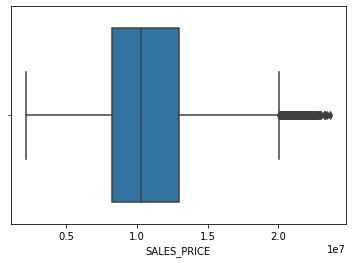

In [14]:
sns.boxplot(data['SALES_PRICE'])

**In the above graph , can clearly see that values above 2.0 are acting as the outliers.**

# **Feature engineering**

In [15]:
data.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

Some of the features are not very convenient. That's why we're going to change some of them to have more representative features. Among them, we can find these changes :

1.Making a new column called **Total_Price** (reg_fee+commis+sales_price)

2.Change object(dtype) to data_time_format for DATA_SALE and DATE_BUILD

3.Making a new column called **AGE** (DATE_BUILD - DATE_SALE)

4.Making a change to datatypes of bedroom and bathroom 

5.Changing Spelling

In [16]:
data['Total_Price'] = data['REG_FEE'] + data['COMMIS'] + data['SALES_PRICE']

In [17]:
data['DATE_SALE'] = pd.to_datetime(data['DATE_SALE'],format='%d-%m-%Y')
data['DATE_BUILD'] = pd.to_datetime(data['DATE_BUILD'],format='%d-%m-%Y')

In [18]:
data['AGE'] = pd.DatetimeIndex(data['DATE_SALE']).year - pd.DatetimeIndex(data['DATE_BUILD']).year

In [19]:
data['QS_BATHROOM'] = data['QS_BATHROOM'].astype(int)
data['QS_BEDROOM'] = data['QS_BEDROOM'].astype(int)

In [20]:
data['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [21]:
data['AREA'].replace(['Ann Nagar','Ana Nagar'],'Anna Nagar',inplace=True)
data['AREA'].replace(['Karapakam'],'Karapakkam',inplace=True)
data['AREA'].replace('Velchery','Velachery',inplace=True)
data['AREA'].replace(['Adyar','Adyr'],'Adyar',inplace=True)
data['AREA'].replace(['Chrompet','Chrompt','Chrmpet'],'chrompet',inplace=True)
data['AREA'].replace(['KKNagar'],'KK Nagar',inplace=True)
data['AREA'].replace(['TNagar'],'T Nagar',inplace=True)
data['PARK_FACIL'].replace('Noo','No',inplace=True)
data['UTILITY_AVAIL'].replace('AllPub','All Pub',inplace=True)
data['UTILITY_AVAIL'].replace('NoSewr','NoSeWa',inplace=True)
data['BUILDTYPE'].replace('Comercial','Commercial',inplace=True)
data['BUILDTYPE'].replace('Other','Others',inplace=True)

In [22]:
data['SALE_COND'] = data['SALE_COND'].replace({'adj land':'adjland', 
                       'normal sale':'normal sale',
                       'partiall':'partial',
                       'ab normal':'abnormal'})

In [23]:
data['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [24]:
data['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [25]:
data['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'chrompet',
       'KK Nagar', 'T Nagar', 'Chormpet'], dtype=object)

# **EDA**

In [26]:
data.dtypes

PRT_ID                   object
AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM               float64
N_BATHROOM              float64
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD       datetime64[ns]
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                float64
QS_BATHROOM               int64
QS_BEDROOM                int64
QS_OVERALL              float64
REG_FEE                   int64
COMMIS                    int64
SALES_PRICE               int64
Total_Price               int64
AGE                       int64
dtype: object

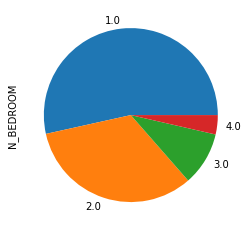

In [27]:
data['N_BEDROOM'].value_counts().plot(kind='pie')

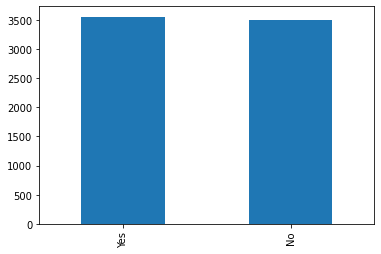

In [28]:
data['PARK_FACIL'].value_counts().plot(kind='bar')

In [29]:
data.describe()

INT_SQFT  DIST_MAINROAD    N_BEDROOM   N_BATHROOM       N_ROOM  \
count  7056.000000    7056.000000  7056.000000  7056.000000  7056.000000   
mean   1381.316752      99.569161     1.636621     1.213152     3.686650   
std     457.860850      57.403870     0.803633     0.409563     1.020011   
min     500.000000       0.000000     1.000000     1.000000     2.000000   
25%     991.000000      50.000000     1.000000     1.000000     3.000000   
50%    1369.500000      99.000000     1.000000     1.000000     4.000000   
75%    1744.000000     148.000000     2.000000     1.000000     4.000000   
max    2500.000000     200.000000     4.000000     2.000000     6.000000   

          QS_ROOMS  QS_BATHROOM   QS_BEDROOM   QS_OVERALL        REG_FEE  \
count  7056.000000  7056.000000  7056.000000  7056.000000    7056.000000   
mean      3.517177     3.068452     3.055981     3.503389  376791.852608   
std       0.892141     0.875684     0.871543     0.527313  143109.581793   
min       2.000000     2.000000     2.000000     2.000000   71177.000000   
25%       2.700000     2.000000     2.000000     3.130000  272117.500000   
50%       3.500000     3.000000     3.000000     3.500000  349444.500000   
75%       4.300000     4.000000     4.000000     3.890000  451030.500000   
max       5.000000     5.000000     5.000000     4.970000  983922.000000   

              COMMIS   SALES_PRICE   Total_Price          AGE  
count    7056.000000  7.056000e+03  7.056000e+03  7056.000000  
mean   140994.273384  1.088801e+07  1.140579e+07    24.273526  
std     78774.465963  3.769081e+06  3.945567e+06    12.331565  
min      5055.000000  2.156875e+06  2.253935e+06     3.000000  
25%     84212.750000  8.266790e+06  8.639780e+06    14.000000  
50%    127640.500000  1.031922e+07  1.080447e+07    23.000000  
75%    184449.000000  1.298148e+07  1.360245e+07    34.000000  
max    495405.000000  2.366734e+07  2.496904e+07    55.000000

In [30]:
data['Total_Price'].describe()

count    7.056000e+03
mean     1.140579e+07
std      3.945567e+06
min      2.253935e+06
25%      8.639780e+06
50%      1.080447e+07
75%      1.360245e+07
max      2.496904e+07
Name: Total_Price, dtype: float64

The median Total_price is  10804468.0 Lets see how it varies with INT_SQFT


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


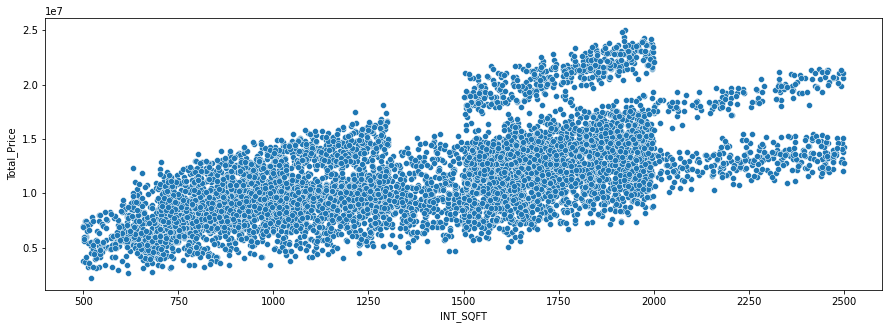

In [31]:
print("The median Total_price is ",data['Total_Price'].median(),"Lets see how it varies with INT_SQFT")
plt.figure(figsize=(15,5))
sns.scatterplot(data['INT_SQFT'],data['Total_Price'])

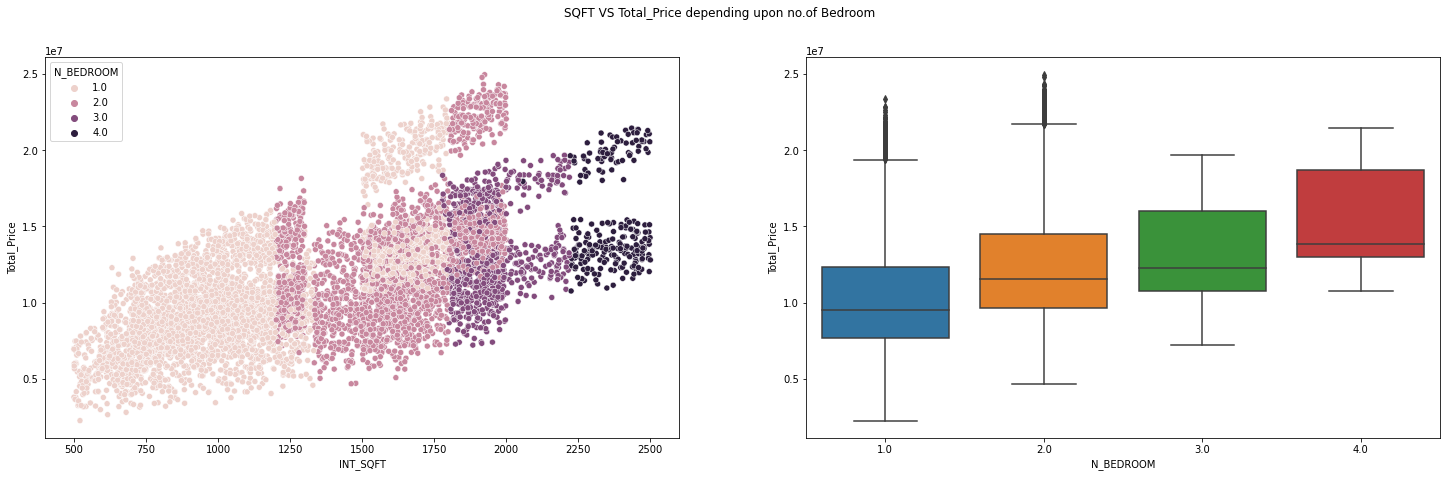

In [32]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(25,7))
fig.suptitle("SQFT VS Total_Price depending upon no.of Bedroom")

sns.scatterplot(x=data['INT_SQFT'],y=data['Total_Price'],data = data,hue='N_BEDROOM',ax=ax1)
sns.boxplot(x=data['N_BEDROOM'],y=data['Total_Price'])

From the above two graphs we can conclude

1. Total_Price and SQFT have a Positive correlation
1. Number of Bedroom is directly proportional to Total_Price inc

The median Total_price is  10804468.0 Lets see how it varies with AGE of the House


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


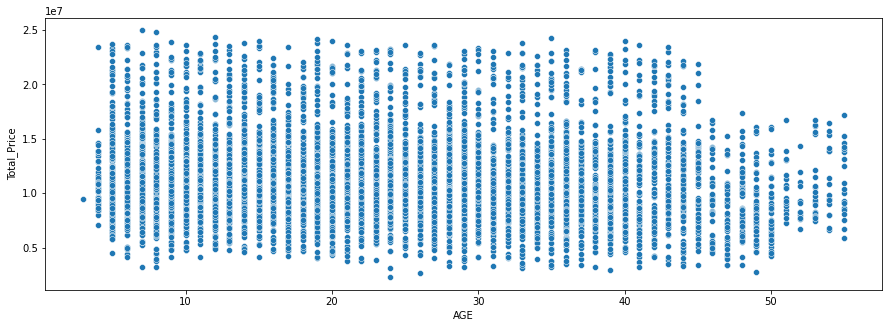

In [33]:
print("The median Total_price is ",data['Total_Price'].median(),"Lets see how it varies with AGE of the House")
plt.figure(figsize=(15,5))
sns.scatterplot(data['AGE'],data['Total_Price'])

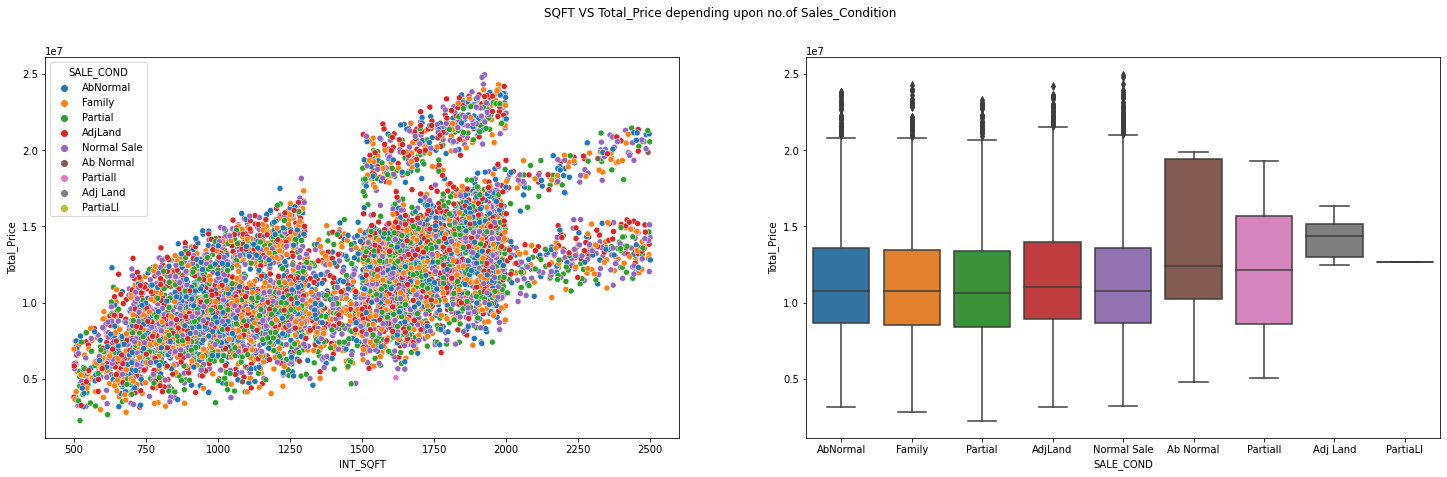

In [34]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(25,7))
fig.suptitle("SQFT VS Total_Price depending upon no.of Sales_Condition")

sns.scatterplot(x=data['INT_SQFT'],y=data['Total_Price'],data = data,hue='SALE_COND',ax=ax1)
sns.boxplot(x=data['SALE_COND'],y=data['Total_Price'])

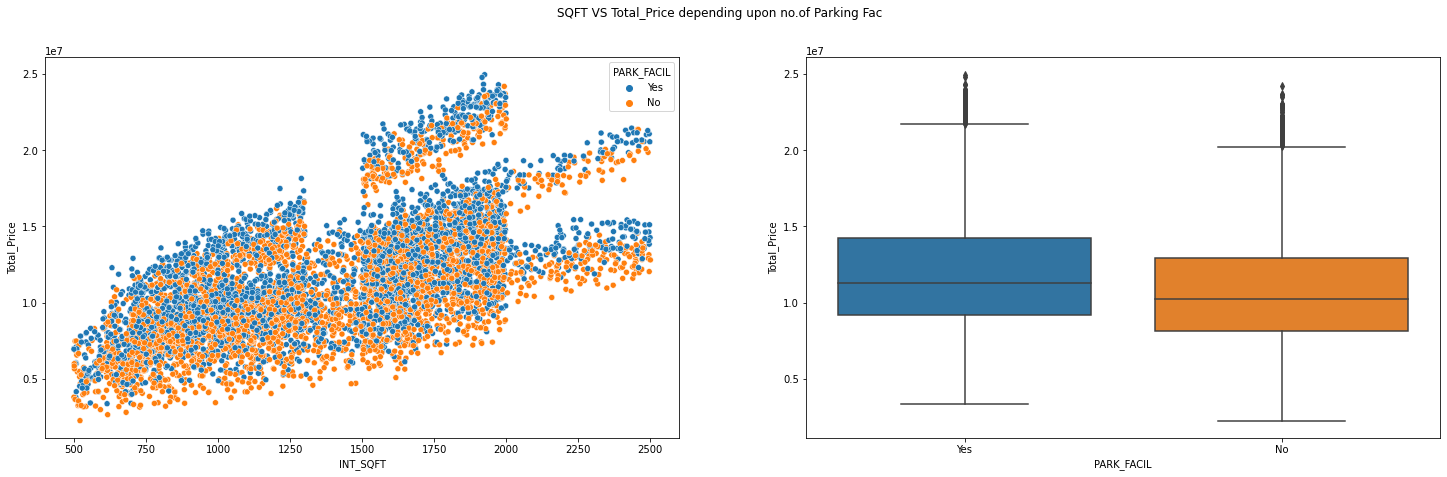

In [35]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(25,7))
fig.suptitle("SQFT VS Total_Price depending upon no.of Parking Fac")

sns.scatterplot(x=data['INT_SQFT'],y=data['Total_Price'],data = data,hue='PARK_FACIL',ax=ax1)
sns.boxplot(x=data['PARK_FACIL'],y=data['Total_Price'])

Let we see how price varies btw dist from the main road

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


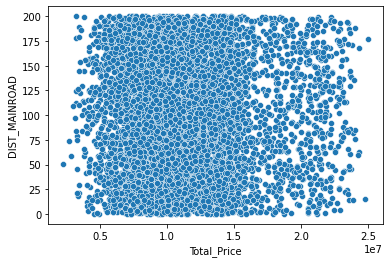

In [36]:
sns.scatterplot(data['Total_Price'],data['DIST_MAINROAD'])

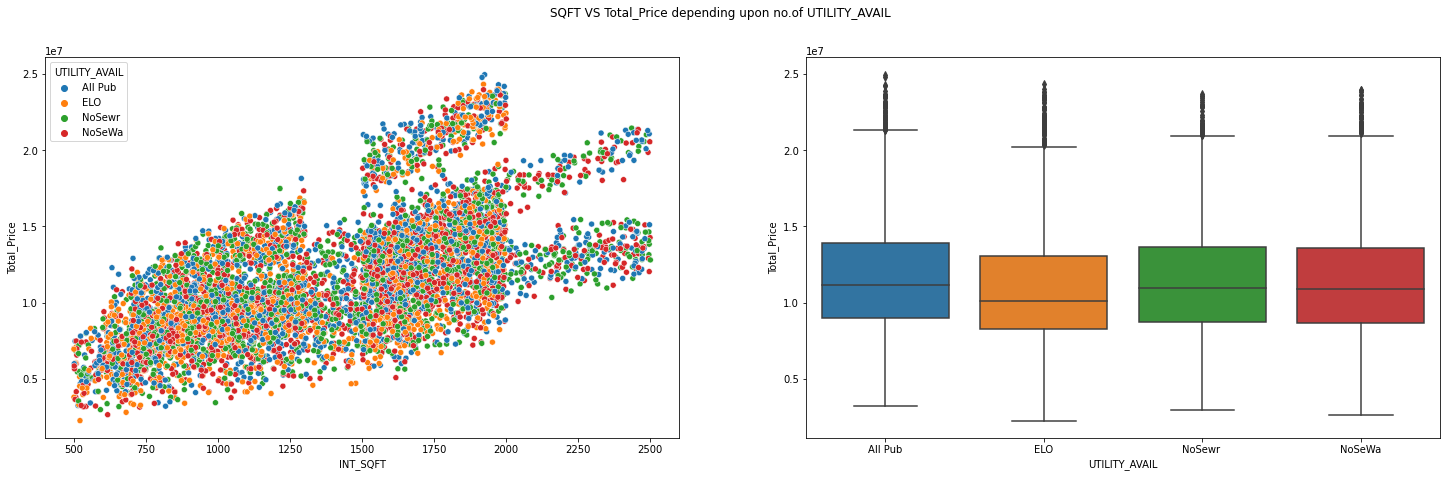

In [37]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(25,7))
fig.suptitle("SQFT VS Total_Price depending upon no.of UTILITY_AVAIL")

sns.scatterplot(x=data['INT_SQFT'],y=data['Total_Price'],data = data,hue='UTILITY_AVAIL',ax=ax1)
sns.boxplot(x=data['UTILITY_AVAIL'],y=data['Total_Price'])

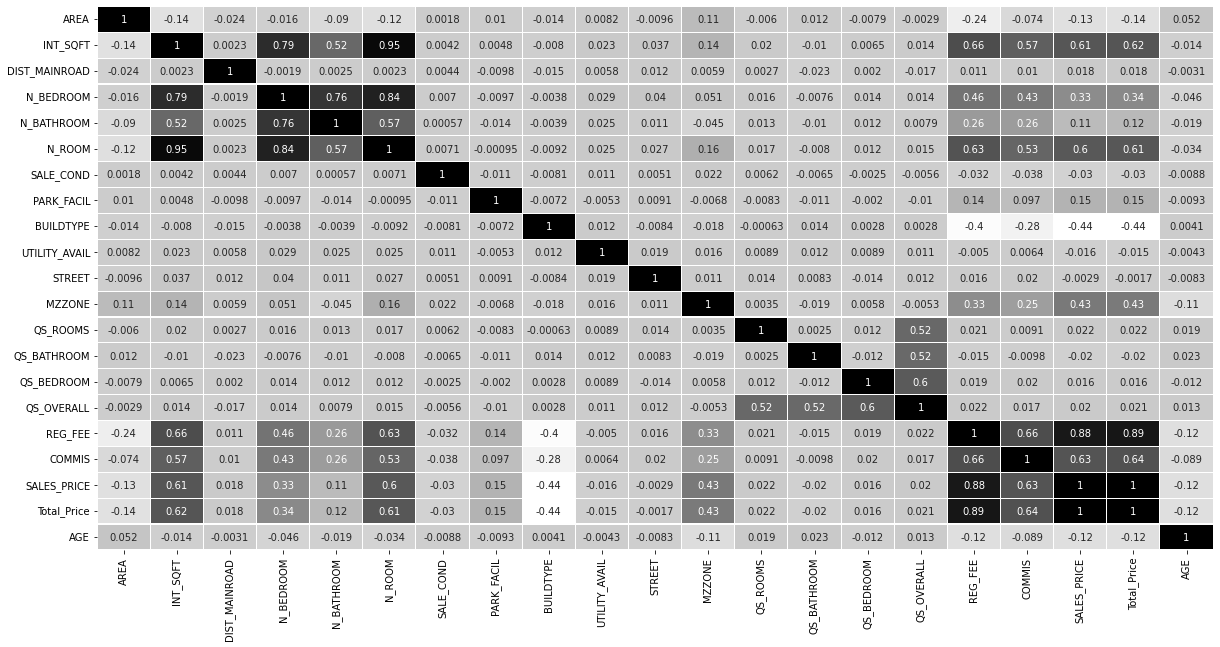

In [56]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,cbar=False,cmap='Greys',linewidths=0.1)

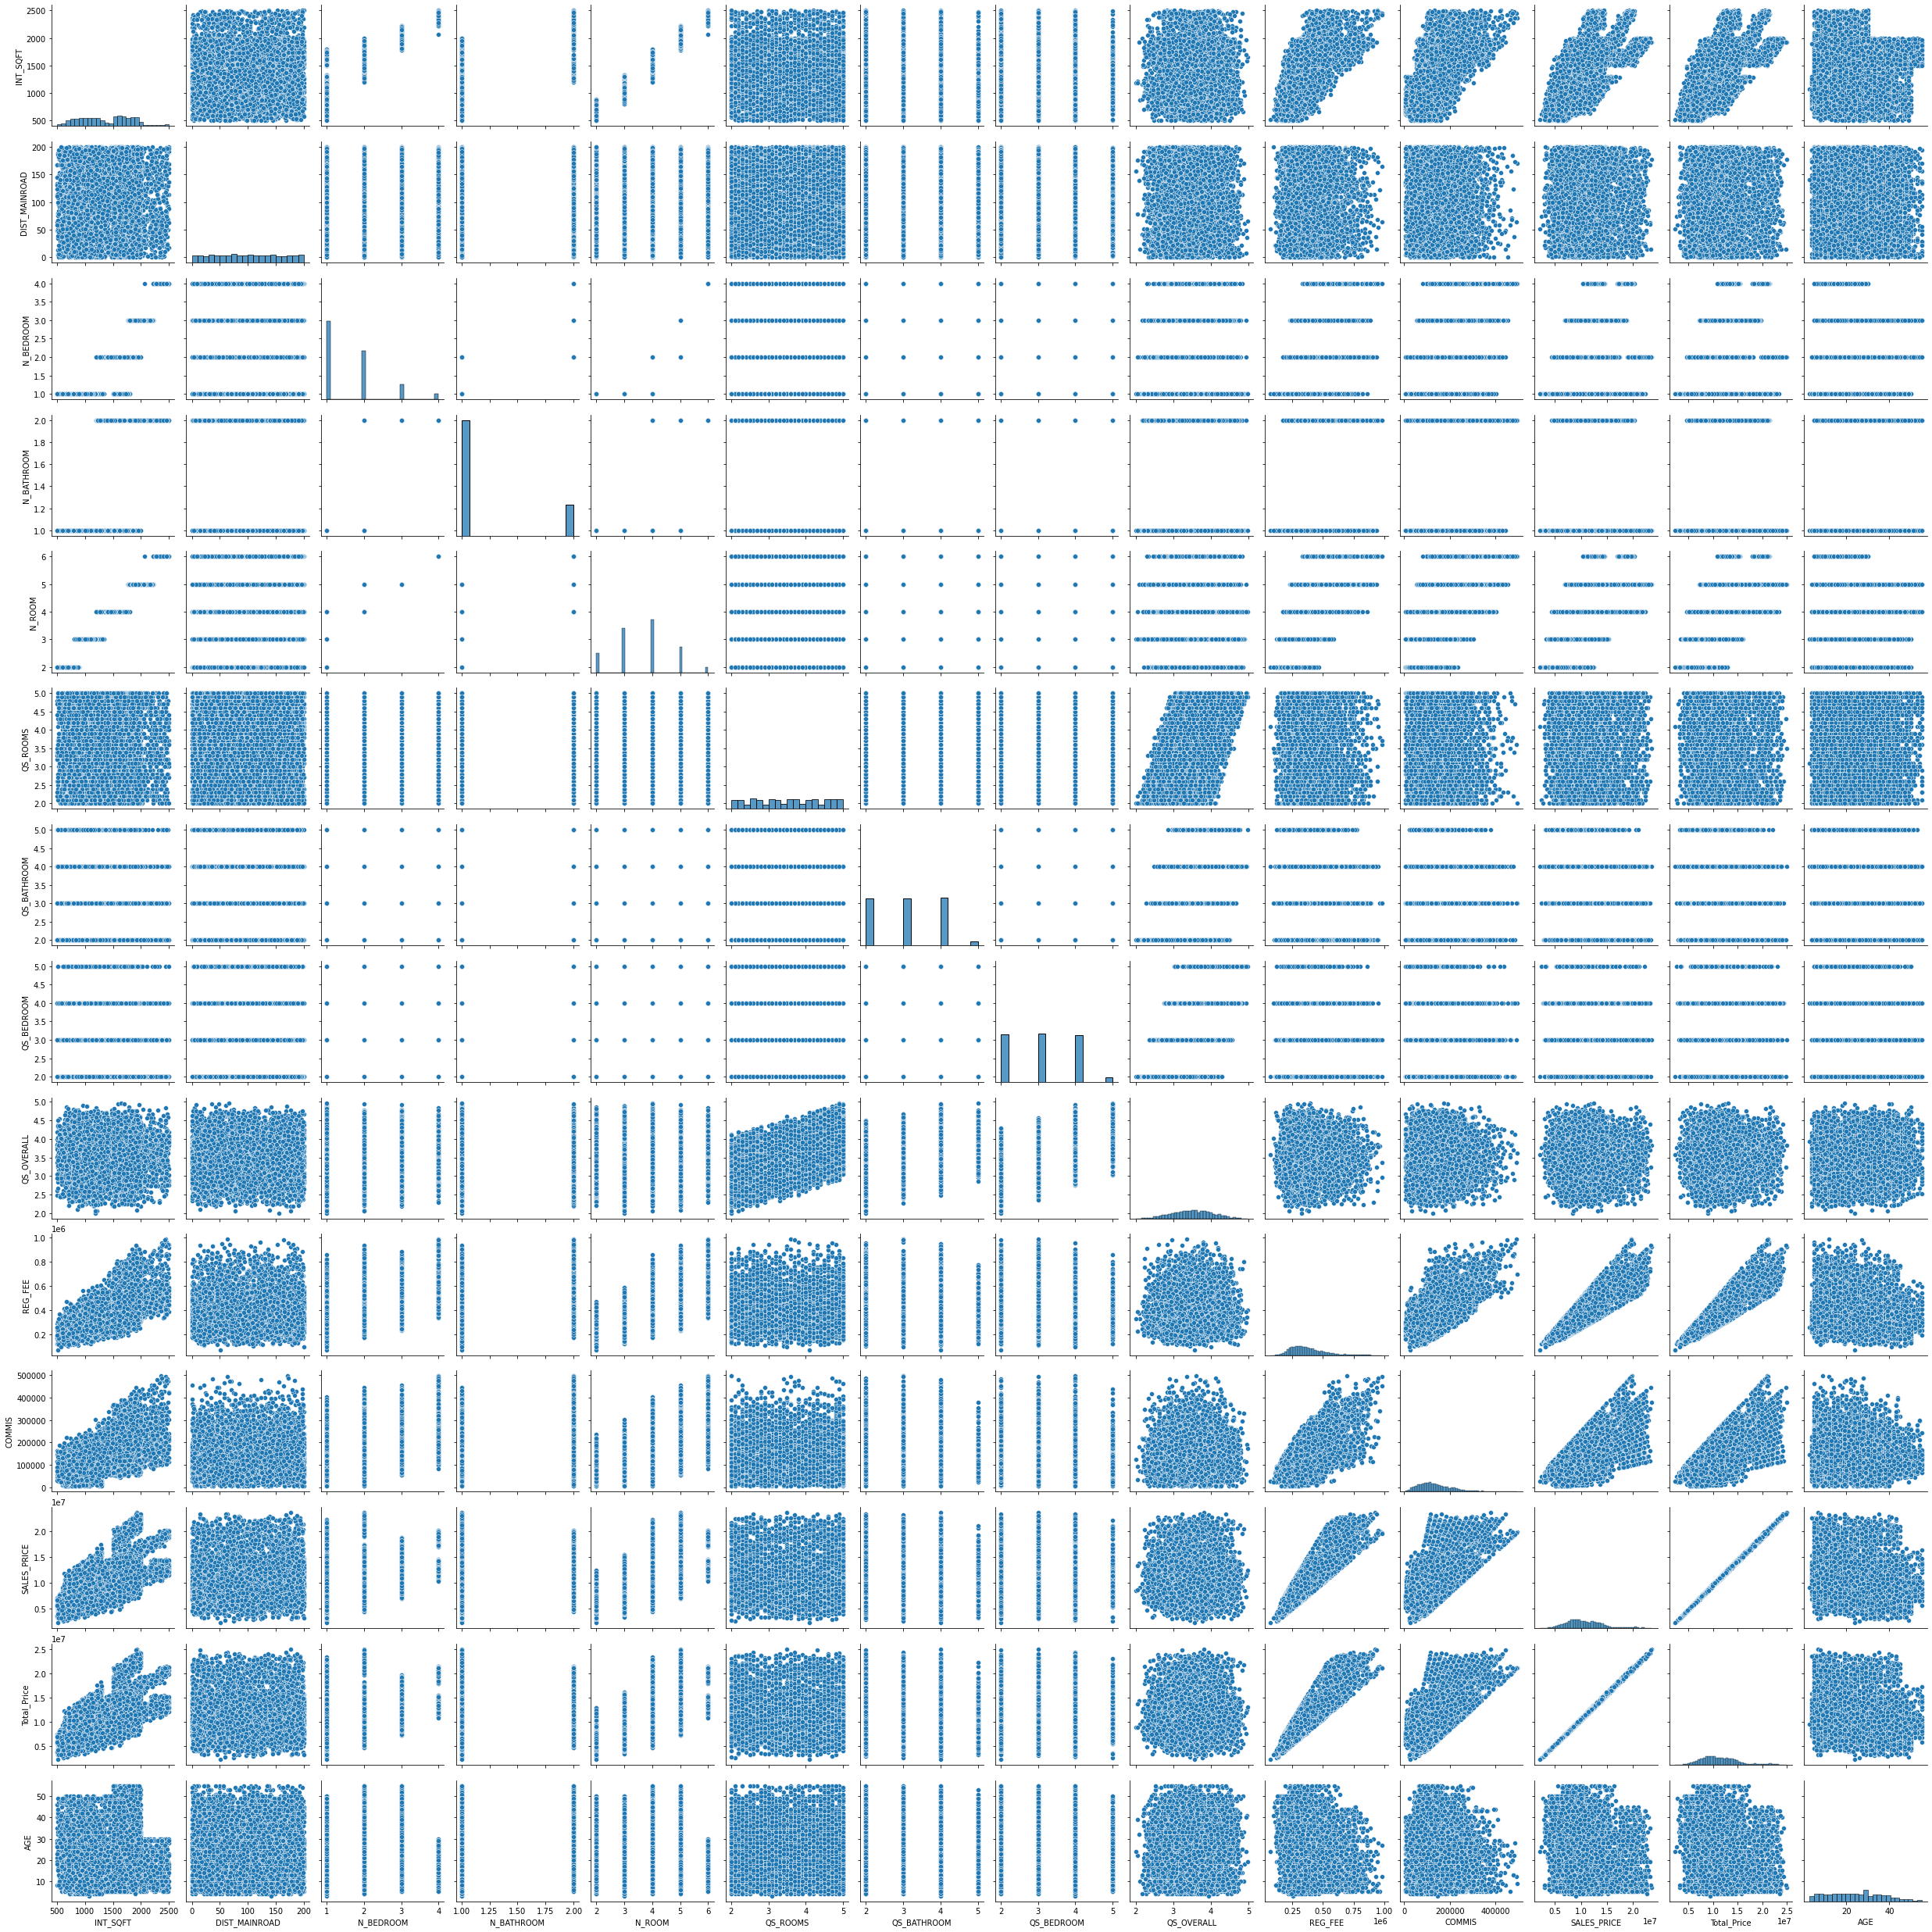

In [39]:

sns.pairplot(data)
plt.show()

In [40]:
data.dtypes

PRT_ID                   object
AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM               float64
N_BATHROOM              float64
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD       datetime64[ns]
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                float64
QS_BATHROOM               int64
QS_BEDROOM                int64
QS_OVERALL              float64
REG_FEE                   int64
COMMIS                    int64
SALES_PRICE               int64
Total_Price               int64
AGE                       int64
dtype: object

In [41]:


from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

data['AREA'] = encoder.fit_transform(data['AREA'])
data['SALE_COND'] = encoder.fit_transform(data['SALE_COND'])
data['PARK_FACIL'] = encoder.fit_transform(data['PARK_FACIL'])
data['SALE_COND'] = encoder.fit_transform(data['SALE_COND'])
data['UTILITY_AVAIL'] = encoder.fit_transform(data['UTILITY_AVAIL'])
data['STREET'] = encoder.fit_transform(data['STREET'])
data['MZZONE'] = encoder.fit_transform(data['MZZONE'])
data['BUILDTYPE'] = encoder.fit_transform(data['BUILDTYPE'])

In [42]:
data.dtypes

PRT_ID                   object
AREA                      int64
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM               float64
N_BATHROOM              float64
N_ROOM                    int64
SALE_COND                 int64
PARK_FACIL                int64
DATE_BUILD       datetime64[ns]
BUILDTYPE                 int64
UTILITY_AVAIL             int64
STREET                    int64
MZZONE                    int64
QS_ROOMS                float64
QS_BATHROOM               int64
QS_BEDROOM                int64
QS_OVERALL              float64
REG_FEE                   int64
COMMIS                    int64
SALES_PRICE               int64
Total_Price               int64
AGE                       int64
dtype: object

In [43]:
y = data['Total_Price']
x = data.drop(['Total_Price','QS_OVERALL','QS_BEDROOM','QS_BATHROOM','DATE_BUILD','DATE_SALE','PRT_ID'],axis=1) #selecting features
x

AREA  INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  SALE_COND  \
0        4      1004            131        1.0         1.0       3          1   
1        1      1986             26        2.0         1.0       5          1   
2        0       909             70        1.0         1.0       3          1   
3        6      1855             14        3.0         2.0       5          4   
4        4      1226             84        1.0         1.0       3          1   
...    ...       ...            ...        ...         ...     ...        ...   
7104     4       598             51        1.0         1.0       2          3   
7105     6      1897             52        3.0         2.0       5          4   
7106     6      1614            152        2.0         1.0       4          5   
7107     4       787             40        1.0         1.0       2          7   
7108     6      1896            156        3.0         2.0       5          7   

      PARK_FACIL  BUILDTYPE  UTILITY_AVAIL  STREET  MZZONE  QS_ROOMS  REG_FEE  \
0              1          0              0       4       0       4.0   380000   
1              0          0              0       0       3       4.9   760122   
2              1          0              1       0       4       4.1   421094   
3              0          2              3       4       2       4.7   356321   
4              1          2              0       0       1       3.0   237000   
...          ...        ...            ...     ...     ...       ...      ...   
7104           0          2              1       1       5       3.0   208767   
7105           1          2              2       1       3       3.6   346191   
7106           0          1              2       0       2       4.3   317354   
7107           1          0              1       4       4       4.6   425350   
7108           1          2              1       4       2       3.1   349177   

      COMMIS  SALES_PRICE  AGE  
0     144400      7600000   44  
1     304049     21717770   11  
2      92114     13159200   20  
3      77042      9630290   22  
4      74063      7406250   30  
...      ...          ...  ...  
7104  107060      5353000   49  
7105  205551     10818480    9  
7106  167028      8351410   28  
7107  119098      8507000   32  
7108   79812      9976480   44  

[7056 rows x 17 columns]

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=0)

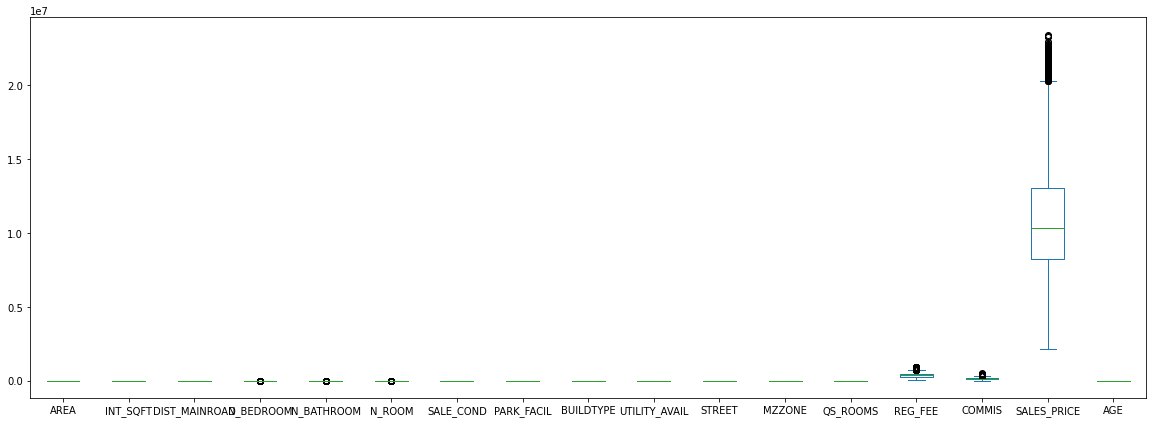

In [45]:
pd.DataFrame(x_train, columns=x_train.columns).plot(kind='box',figsize=(20,7))
plt.show()

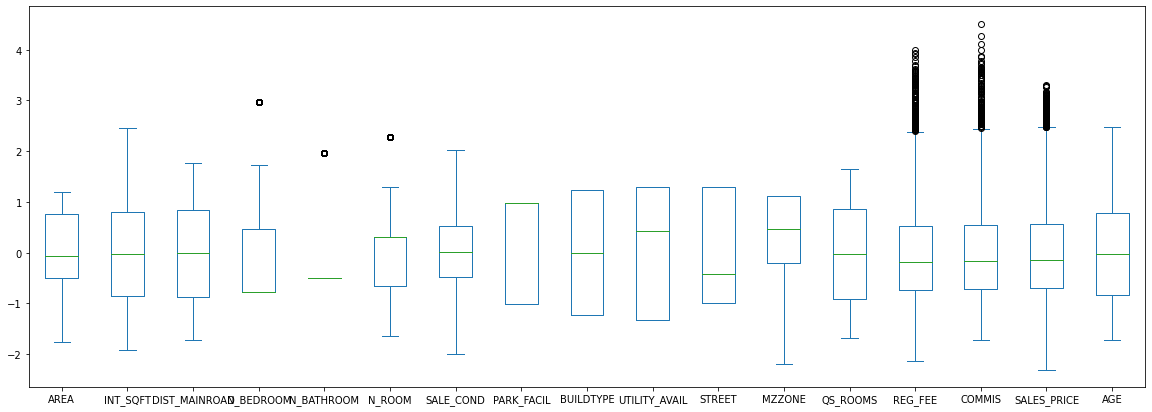

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
model = scaler.fit(x_train)
xtrain = pd.DataFrame(model.transform(x_train),columns=x_train.columns)
xtest = pd.DataFrame(model.transform(x_test),columns=x_test.columns)
xtrain.plot(kind='box',figsize=(20,7))

2. **LinearRegression**

In [50]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(xtrain,y_train)
y_pred = reg.predict(xtest)

In [51]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

1.0


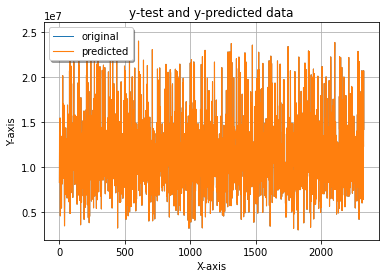

In [52]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()